ANALISIS EXPLORATORIO DE NUESTRA DATA

I. IMPORTAMOS LAS LIBRERIAS A UTILIZAR PARA NUESTRO ANÁLISIS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

II. IMPORTAMOS LA DATA OBTENIDA DESPUES DE LA ETAPA DE LIMPIEZA DE DATOS Y PROCEDEMOS A VISUALIZARLA

In [2]:
df_movies = pd.read_csv('data_movies_completa.csv')

In [3]:
df_movies.head()

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,...,spoken_languages,status,tagline,title,vote_average,vote_count,release_year,return,cast,director
0,Toy Story Collection,30000000,"Animation, Comedy, Family",862,en,"Led by Woody, Andy's toys live happily in his ...",21.95,Pixar Animation Studios,United States of America,1995-10-30,...,English,Released,NaN,Toy Story,7.7,5415.0,1995,12.45,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",John Lasseter
1,Colección desconocida,65000000,"Adventure, Fantasy, Family",8844,en,When siblings Judy and Peter discover an encha...,17.02,"TriStar Pictures, Teitler Film, Interscope Com...",United States of America,1995-12-15,...,"English, Français",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0,1995,4.04,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",Joe Johnston
2,Grumpy Old Men Collection,0,"Romance, Comedy",15602,en,A family wedding reignites the ancient feud be...,11.71,"Warner Bros., Lancaster Gate",United States of America,1995-12-22,...,English,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0,1995,0.00,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...",Howard Deutch
3,Colección desconocida,16000000,"Comedy, Drama, Romance",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.86,Twentieth Century Fox Film Corporation,United States of America,1995-12-22,...,English,Released,Friends are the people who let you be yourself...,Waiting to Exhale,6.1,34.0,1995,5.09,"Whitney Houston, Angela Bassett, Loretta Devin...",Forest Whitaker
4,Father of the Bride Collection,0,Comedy,11862,en,Just when George Banks has recovered from his ...,8.39,"Sandollar Productions, Touchstone Pictures",United States of America,1995-02-10,...,English,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,5.7,173.0,1995,0.00,"Steve Martin, Diane Keaton, Martin Short, Kimb...",Charles Shyer


III. REALIZAMOS UNA PRIMERA INSPECCIÓN DE NUESTRO DATASET

In [4]:
#Veamos la cantidad de filas y columnas
df_movies.shape

(45451, 22)

In [5]:
#Veamos los metadatos
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45451 entries, 0 to 45450
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  45451 non-null  object 
 1   budget                 45451 non-null  int64  
 2   genres                 43067 non-null  object 
 3   id                     45451 non-null  int64  
 4   original_language      45440 non-null  object 
 5   overview               44510 non-null  object 
 6   popularity             45451 non-null  float64
 7   production_companies   33634 non-null  object 
 8   production_countries   39232 non-null  object 
 9   release_date           45451 non-null  object 
 10  revenue                45451 non-null  float64
 11  runtime                45205 non-null  float64
 12  spoken_languages       41554 non-null  object 
 13  status                 45371 non-null  object 
 14  tagline                20425 non-null  object 
 15  ti

OBS.- Nuestro dataset consta de 45451 filas y 21 columnas de las cuales vemos que tenemos variables con datos numericos de tipo int y float, además de datos categóricos de tipo object. También observamos que nuestra columna release_date deberia ser de formato datetime por lo que procederemos a cambiar el tipo de dato.

In [6]:
#Cambiamos el tipo de dato a fecha en la columna release_date
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'], errors='coerce')

In [7]:
#Realicemos un conteo de la cantidad de nulos por columna
df_movies.isnull().sum()

belongs_to_collection        0
budget                       0
genres                    2384
id                           0
original_language           11
overview                   941
popularity                   0
production_companies     11817
production_countries      6219
release_date                 0
revenue                      0
runtime                    246
spoken_languages          3897
status                      80
tagline                  25026
title                        0
vote_average                 0
vote_count                   0
release_year                 0
return                       0
cast                      2354
director                   835
dtype: int64

OBS.- Aunque nuestra data fue limpiada podemos notar que tenemos una cantidad importante de datos nulos en varias columnas de nuestro dataset, por lo que deberiamos proceder eliminar los nulos en algunas columnas y/o imputar datos en otras.

IV. CREAREMOS UN DATASET POR TIPO DE DATO, UNO PARA LOS DATOS NUMERICOS Y OTRO PARA LOS CATEGORICOS

Llevaremos a cabo esta separación de los datos para poder calcular valores estadísticos básicos de nuestras columnas numéricas y para una visualizacion grafica de las columnas con datos categóricos con la finalidad de tomar la decisión más adecuada en el proceso de imputación de datos.

1.- Analicemos la data con variables numéricas

In [8]:
#Creamos un dataset para las variables numéricas
data_numerica = df_movies.select_dtypes(include=['number'])

In [9]:
data_numerica.head()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year,return
0,30000000,862,21.95,373554033.0,81.0,7.7,5415.0,1995,12.45
1,65000000,8844,17.02,262797249.0,104.0,6.9,2413.0,1995,4.04
2,0,15602,11.71,0.0,101.0,6.5,92.0,1995,0.00
3,16000000,31357,3.86,81452156.0,127.0,6.1,34.0,1995,5.09
4,0,11862,8.39,76578911.0,106.0,5.7,173.0,1995,0.00


In [10]:
#Realizamos una inspección de los valores estadísticos básicos
data_numerica.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count,release_year,return
count,4.545100e+04,45451.000000,45451.000000,4.545100e+04,45205.000000,45451.000000,45451.000000,45451.000000,4.545100e+04
mean,4.231294e+06,107984.599745,2.926851,1.121930e+07,94.181905,5.624085,109.989703,1991.882027,6.589542e+02
std,1.742942e+07,112111.336735,6.006471,6.433984e+07,38.329504,1.915424,491.352336,24.057726,7.463165e+04
min,0.000000e+00,2.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1874.000000,0.000000e+00
25%,0.000000e+00,26367.500000,0.390000,0.000000e+00,85.000000,5.000000,3.000000,1978.000000,0.000000e+00
50%,0.000000e+00,59871.000000,1.130000,0.000000e+00,95.000000,6.000000,10.000000,2001.000000,0.000000e+00
75%,0.000000e+00,156327.500000,3.690000,0.000000e+00,107.000000,6.800000,34.000000,2010.000000,0.000000e+00
max,3.800000e+08,469172.000000,547.490000,2.787965e+09,1256.000000,10.000000,14075.000000,2020.000000,1.239638e+07


In [11]:
#Realizamos un conteo de la cantidad de nulos en nuestra data_numerica
data_numerica.isnull().sum()

budget            0
id                0
popularity        0
revenue           0
runtime         246
vote_average      0
vote_count        0
release_year      0
return            0
dtype: int64

OBS.- Podemos observar que tenemos 246 valores nulos en nuestra columna runtime y que no es asi en las demas columnas, eliminar dichos valores nulos no es lo máss conveniente por lo que procederos a reemplazar los valores nulos con la mediana ya que es el tiempo estandar que usualmente tiene una película.

In [12]:
#Reemplazamos los valores nulos con la mediana en nuestra data_numerica
data_numerica.loc[:, 'runtime'].fillna(95, inplace=True)

In [13]:
#Reemplazamos los valores nulos con la mediana en nuestra data inicial df_movies
df_movies.loc[:, 'runtime'].fillna(95, inplace=True)

In [14]:
#Vemos que nuestra data_numerica ya no tiene valores nulos
data_numerica.isnull().sum()

budget          0
id              0
popularity      0
revenue         0
runtime         0
vote_average    0
vote_count      0
release_year    0
return          0
dtype: int64

2.- Analicemos la data con variables categóricas

In [15]:
#Creamos un dataset para las variables categóricas
data_categorica = df_movies.select_dtypes(include=['object', 'datetime64'])

In [16]:
data_categorica.head()

,belongs_to_collection,genres,original_language,overview,production_companies,production_countries,release_date,spoken_languages,status,tagline,title,cast,director
0,Toy Story Collection,"Animation, Comedy, Family",en,"Led by Woody, Andy's toys live happily in his ...",Pixar Animation Studios,United States of America,1995-10-30,English,Released,NaN,Toy Story,"Tom Hanks, Tim Allen, Don Rickles, Jim Varney,...",John Lasseter
1,Colección desconocida,"Adventure, Fantasy, Family",en,When siblings Judy and Peter discover an encha...,"TriStar Pictures, Teitler Film, Interscope Com...",United States of America,1995-12-15,"English, Français",Released,Roll the dice and unleash the excitement!,Jumanji,"Robin Williams, Jonathan Hyde, Kirsten Dunst, ...",Joe Johnston
2,Grumpy Old Men Collection,"Romance, Comedy",en,A family wedding reignites the ancient feud be...,"Warner Bros., Lancaster Gate",United States of America,1995-12-22,English,Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,"Walter Matthau, Jack Lemmon, Ann-Margret, Soph...",Howard Deutch
3,Colección desconocida,"Comedy, Drama, Romance",en,"Cheated on, mistreated and stepped on, the wom...",Twentieth Century Fox Film Corporation,United States of America,1995-12-22,English,Released,Friends are the people who let you be yourself...,Waiting to Exhale,"Whitney Houston, Angela Bassett, Loretta Devin...",Forest Whitaker
4,Father of the Bride Collection,Comedy,en,Just when George Banks has recovered from his ...,"Sandollar Productions, Touchstone Pictures",United States of America,1995-02-10,English,Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,"Steve Martin, Diane Keaton, Martin Short, Kimb...",Charles Shyer


In [17]:
data_categorica.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45451 entries, 0 to 45450
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   belongs_to_collection  45451 non-null  object        
 1   genres                 43067 non-null  object        
 2   original_language      45440 non-null  object        
 3   overview               44510 non-null  object        
 4   production_companies   33634 non-null  object        
 5   production_countries   39232 non-null  object        
 6   release_date           45451 non-null  datetime64[ns]
 7   spoken_languages       41554 non-null  object        
 8   status                 45371 non-null  object        
 9   tagline                20425 non-null  object        
 10  title                  45451 non-null  object        
 11  cast                   43097 non-null  object        
 12  director               44616 non-null  object        
dtypes

In [18]:
#Veamos la cantidad de nulos en nuestra data_categorica
data_categorica.isnull().sum()

belongs_to_collection        0
genres                    2384
original_language           11
overview                   941
production_companies     11817
production_countries      6219
release_date                 0
spoken_languages          3897
status                      80
tagline                  25026
title                        0
cast                      2354
director                   835
dtype: int64

OBS.- Aqui podemos ver que la mayor cantidad de datos nulos se dan en las columnas con variables categóricas por lo que no podemos reemplazarlas por un valor estandar, debido a la importancia de conocer los datos completos de las peliculas para nuestras consultas y sistema de recomendaciones procederemos a crear dataframes con las columnas necesarias para los sistemas de consultas y de recomendaciones solicitados por la administración del proyecto.

IV. CREANDO DATAFRAMES PARA NUESTRO SISTEMA DE CONSULTAS

A. Para nuestro sistema de consultas sobre el mes, el dia, popularidad de la película y puntuación de la película.

In [19]:
#Creamos nuestro dataframe
columnas1=['title', 'release_date', 'release_year', 'popularity', 'vote_average', 'vote_count']
df_fun1 = df_movies[columnas1]

In [20]:
#Visualizamos la info de nuestro dataframe
df_fun1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45451 entries, 0 to 45450
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   title         45451 non-null  object        
 1   release_date  45451 non-null  datetime64[ns]
 2   release_year  45451 non-null  int64         
 3   popularity    45451 non-null  float64       
 4   vote_average  45451 non-null  float64       
 5   vote_count    45451 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 2.1+ MB


B. Para nuestro sistema de consulta sobre actores

Debido a que conocer el nombre del elenco es vital para nuestras consultas debemos tomar en cuenta que los valores nulos en nuestra columna cast no aportan a nuestro análisis por lo que procederemos a eliminarlos.

In [21]:
#Creamos nuestro dataframe
columnas2 = ['cast', 'return']
df_fun2 = df_movies[columnas2]

In [22]:
#Contamos la cantidad de nulos
df_fun2.isnull().sum()


cast      2354
return       0
dtype: int64

In [23]:
#Procedemos a eliminar los valores nulos de nuestra columna cast en nuestro dataframe
df_fun2.dropna(subset=['cast'], inplace=True)

C:\Users\Administrador\AppData\Local\Temp\ipykernel_8164\2038608485.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fun2.dropna(subset=['cast'], inplace=True)


In [24]:
#Verificamos
df_fun2.isnull().sum()

cast      0
return    0
dtype: int64

In [25]:
#Visualizamos la info
df_fun2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43097 entries, 0 to 45449
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   cast    43097 non-null  object 
 1   return  43097 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1010.1+ KB


IMPORTANTE.- Debemos resaltar que la cantidad de valores ceros en nuestra columna return es muy grande y esto proviene de tener una gran cantidad de valores ceros en nuestra columna budget y revenue de nuestro dataset inicial y luego de obtener la columna return y reemplazar con valores iguales a cero, esto ocasiono que tengamos una gran cantidad de valores cero que no aportan para nada información a nuestro sistema de consulta, esta observación debe ser llevada a la dirección del proyecto para que nos provean de la data necesaria para solucionar esta inexactitud en los datos correspondientes al presupuesto y a las ganancias.

In [26]:
#Contabilizamos la cantidad de ceros.
cant_zeros = df_fun2['return'].value_counts().get(0, 0)
cant_zeros

37775

In [27]:
#Visualizamos los datos estadisticos basicos de nuestra columnas return
df_fun2['return'].describe().round(2)

count       43097.00
mean          694.95
std         76642.66
min             0.00
25%             0.00
50%             0.00
75%             0.00
max      12396383.00
Name: return, dtype: float64

OBS.- Vemos que más del 75% de nuestros datos en la columna return son igual a cero por lo que no es una información confiable, debemos solicitar acceso a más imformación por parte del área responsable para el acceso a los datos.

C. PARA NUESTRO SISTEMA DE CONSULTA SOBRE DIRECTORES

In [28]:
#Creamos nuestro dataframe
columnas3 = ['director', 'title', 'release_date', 'budget', 'revenue', 'return' ]
df_fun3 = df_movies[columnas3]

In [29]:
df_fun3.head()

,director,title,release_date,budget,revenue,return
0,John Lasseter,Toy Story,1995-10-30,30000000,373554033.0,12.45
1,Joe Johnston,Jumanji,1995-12-15,65000000,262797249.0,4.04
2,Howard Deutch,Grumpier Old Men,1995-12-22,0,0.0,0.00
3,Forest Whitaker,Waiting to Exhale,1995-12-22,16000000,81452156.0,5.09
4,Charles Shyer,Father of the Bride Part II,1995-02-10,0,76578911.0,0.00


In [30]:
#Contamos la cantidad de nulos en nuestro dataframe
df_fun3.isnull().sum()

director        835
title             0
release_date      0
budget            0
revenue           0
return            0
dtype: int64

In [31]:
#Procedemos a eliminar los nulos de la columna director
df_fun3.dropna(subset=['director'], inplace=True)

C:\Users\Administrador\AppData\Local\Temp\ipykernel_8164\3212784888.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fun3.dropna(subset=['director'], inplace=True)


In [32]:
#Verificamos
df_fun3.isnull().sum()

director        0
title           0
release_date    0
budget          0
revenue         0
return          0
dtype: int64

NOTA.- Tenemos los dataframe necesarios para implementar los modelos de consulta solicitados por la dirección del área de análisis por lo que procederemos a guardar estos dataframes en archivos en formato CSV para su posterior uso.

D. PARA NUESTRO SISTEMA DE RECOMENDACIONES DE PELICULA

In [33]:
#Creamos nuestro dataframe
columnas4 = ['title', 'genres', 'popularity', 'vote_average']
df_fun4 = df_movies[columnas4]

In [34]:
df_fun4

,title,genres,popularity,vote_average
0,Toy Story,"Animation, Comedy, Family",21.95,7.7
1,Jumanji,"Adventure, Fantasy, Family",17.02,6.9
2,Grumpier Old Men,"Romance, Comedy",11.71,6.5
3,Waiting to Exhale,"Comedy, Drama, Romance",3.86,6.1
4,Father of the Bride Part II,Comedy,8.39,5.7
...,...,...,...,...
45446,Robin Hood,"Drama, Action, Romance",5.68,5.7
45447,Century of Birthing,Drama,0.18,9.0
45448,Betrayal,"Action, Drama, Thriller",0.90,3.8
45449,Satan Triumphant,NaN,0.00,0.0


V. EXPORTAMOS NUESTROS DATAFRAME

Estos archivos nos serviran para realizar consultas más agiles y eficientes en la etapa de creación de los modelos de consulta solicitados por el departamento de analisis de datos.

In [39]:
df_fun1.to_csv('sistemaconsulta_func1234.csv', index=False)

In [40]:
df_fun2.to_csv('sistemaconsulta_cast.csv', index=False)

In [41]:
df_fun3.to_csv('sistemaconsulta_directors.csv', index=False)

In [35]:
df_fun4.to_csv('sistemarecomendacion.csv', index=False)

VI. ANALISIS DE LOS DATOS

A. Veamos las relaciones que podemos encontrar en nuestra data con valores numéricos.

In [42]:
#Notamos que la columna id aunque es numérica no aporta ninguna información relevante por lo que procedemos a eliminarla.
data_numerica = data_numerica.drop(columns='id', axis=1)

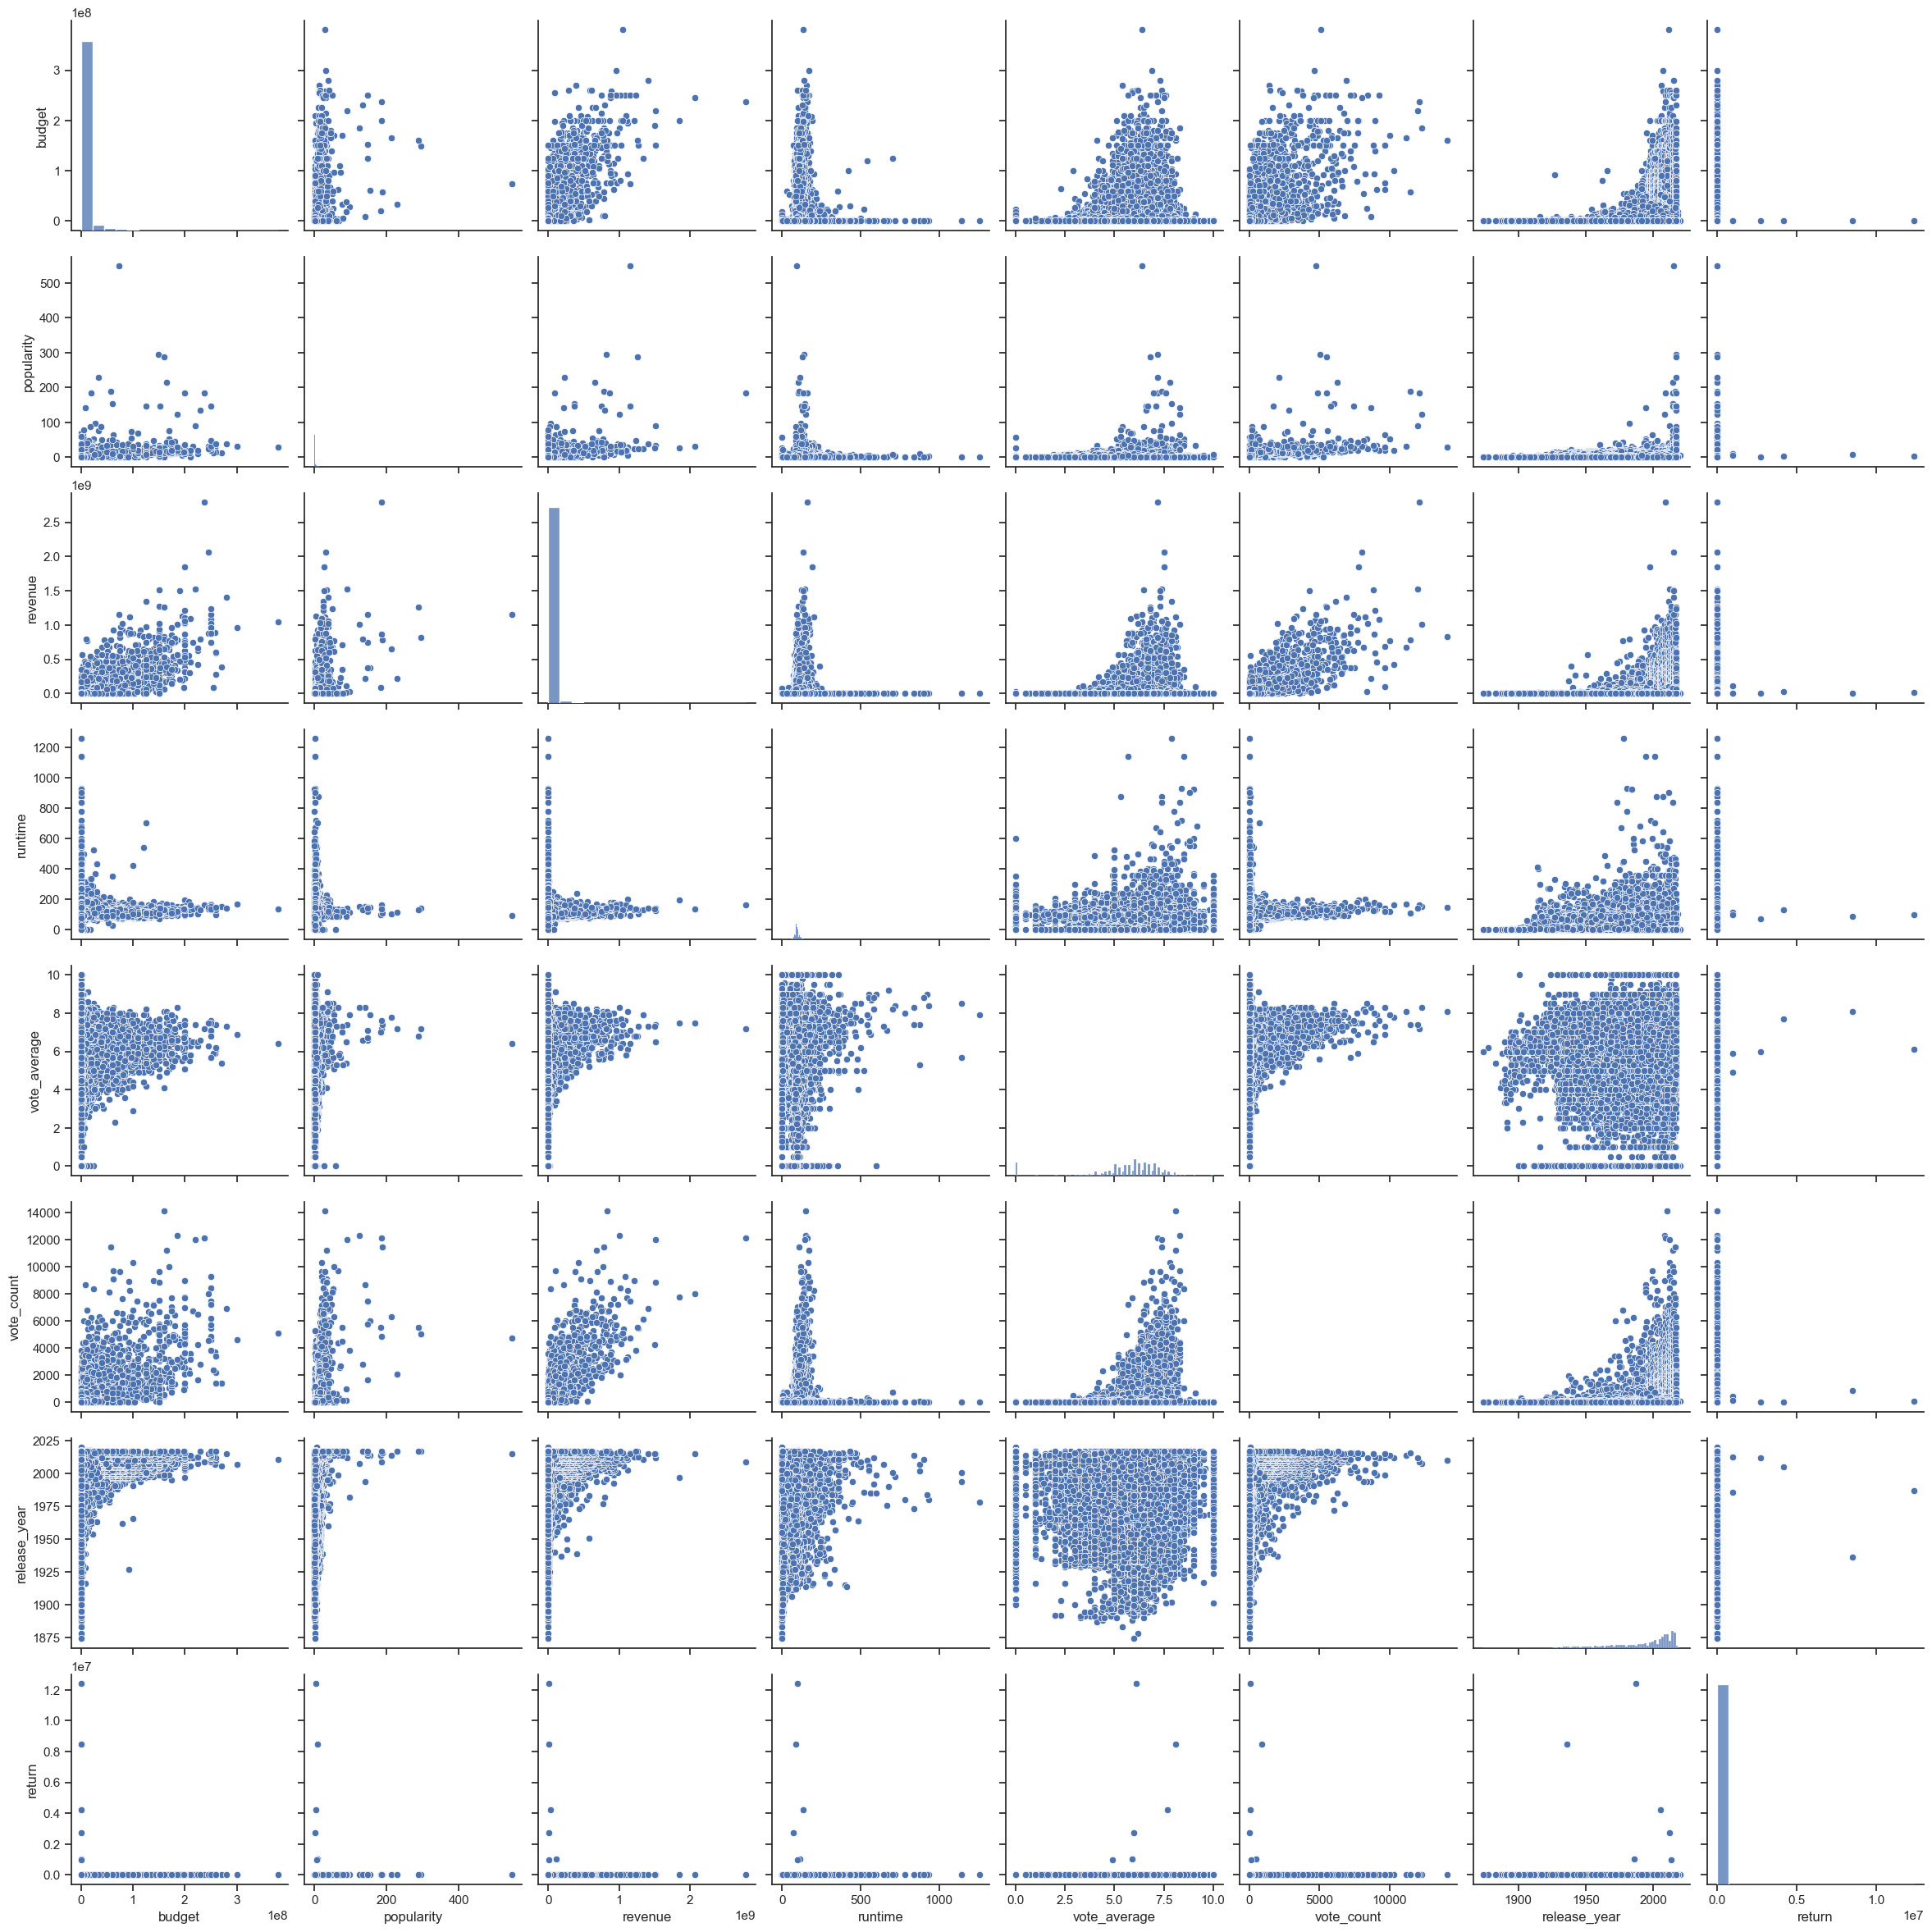

In [43]:
#Visalizamos graficammente las relaciones entre columnas
sns.set(style="ticks")
sns.pairplot(data=data_numerica, height=3)

OBS.- Podemos observar por la forma en la relación de los datos de las columnas budget, popularity, vote_count y revenue con los datos de la columna vote_average guardan una distribución normal que podriamos utilizar para analizar con más profundidad.

OBSERVAREMOS CON MAS DETENIMIENTO ALGUNAS GRAFICAS PARA PODER VISUALIZAR EL COMPORTAMIENTO DE LOS DATOS

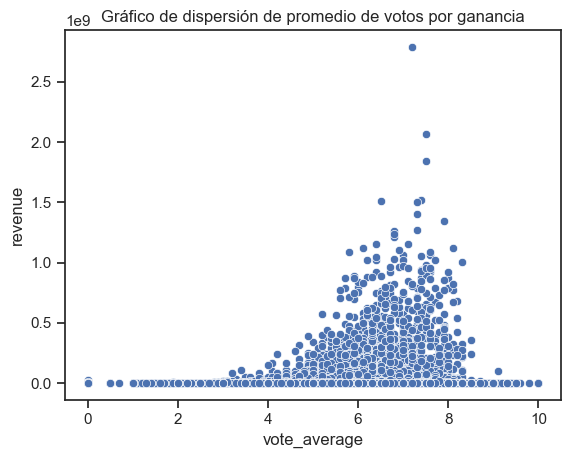

In [44]:
# Diagrama de dispersión de dos columnas numéricas
sns.scatterplot(data=df_movies, x='vote_average', y='revenue')
plt.title('Gráfico de dispersión de promedio de votos por ganancia')
plt.show()

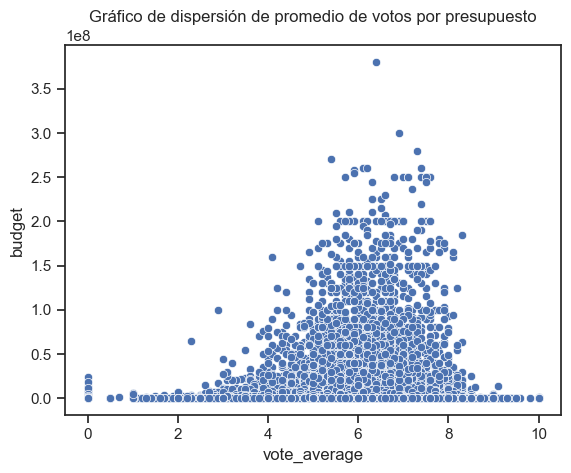

In [45]:
sns.scatterplot(data=df_movies, x='vote_average', y='budget')
plt.title('Gráfico de dispersión de promedio de votos por presupuesto')
plt.show()

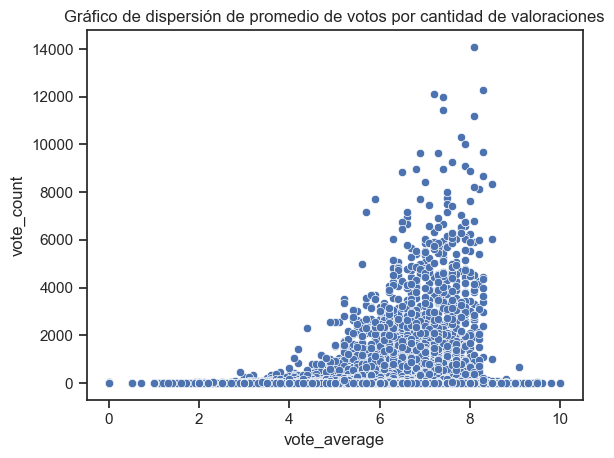

In [46]:
sns.scatterplot(data=df_movies, x='vote_average', y='vote_count')
plt.title('Gráfico de dispersión de promedio de votos por cantidad de valoraciones')
plt.show()

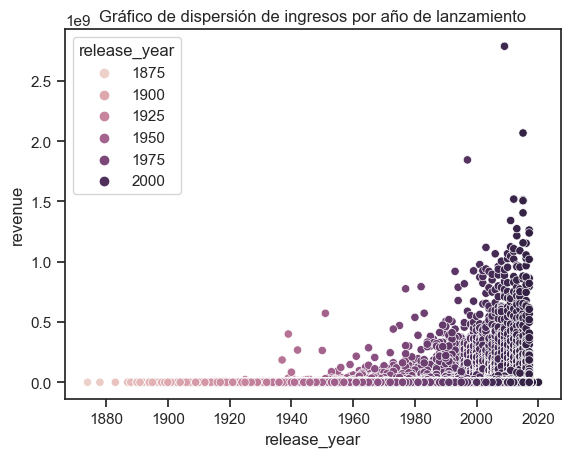

In [212]:
sns.scatterplot(data=df_movies, x='release_year', y='revenue', hue='release_year')
plt.title('Gráfico de dispersión de ingresos por año de lanzamiento')
plt.show()

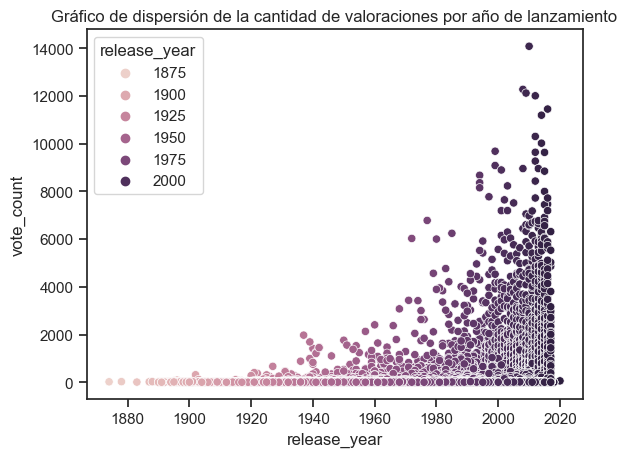

In [49]:
sns.scatterplot(data=df_movies, x='release_year', y='vote_count', hue='release_year')
plt.title('Gráfico de dispersión de la cantidad de valoraciones por año de lanzamiento')
plt.show()

VEAMOS NUESTRO DATAFRAME DE CORRELACIONES ENTRE DATOS

In [50]:
#Veamos la relación entre los datos con un dataframe con los valores de correlación entre los datos
corr = data_numerica.corr()
corr

,budget,popularity,revenue,runtime,vote_average,vote_count,release_year,return
budget,1.000000,0.449509,0.768665,0.134769,0.073120,0.676501,0.131680,-0.002135
popularity,0.449509,1.000000,0.506069,0.129546,0.153829,0.559848,0.131785,0.003213
revenue,0.768665,0.506069,1.000000,0.103855,0.083738,0.811993,0.088311,0.000793
runtime,0.134769,0.129546,0.103855,1.000000,0.154633,0.113437,0.078816,0.000889
vote_average,0.073120,0.153829,0.083738,0.154633,1.000000,0.123556,0.026862,0.005584
vote_count,0.676501,0.559848,0.811993,0.113437,0.123556,1.000000,0.106735,0.003600
release_year,0.131680,0.131785,0.088311,0.078816,0.026862,0.106735,1.000000,-0.005013
return,-0.002135,0.003213,0.000793,0.000889,0.005584,0.003600,-0.005013,1.000000


OBS.- Podemos ver algunos valores de correlación negativa entre las columnas return, budget y release_year lo cual nos indica que no existen relaciones entre estos datos por lo que no deberiamos considerar estas relaciones para el analisis.

<Axes: >

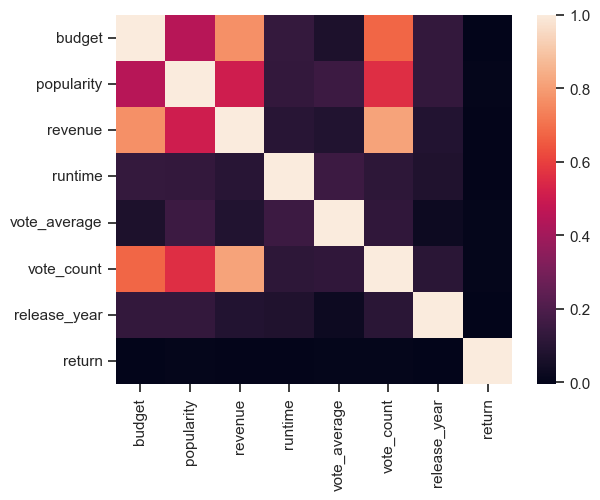

In [51]:
#Diagrama de calor
sns.heatmap(corr)

OBS.- Podemos ver cierta relación entre popularidad y presupuesto, popularidad e ingresos, vote_count y popularidad; y la mayor relación estara entre cantidad de votos y el presupuesto, asi como el presupuesto asignado por peliculas y los ingresos obtenidos.

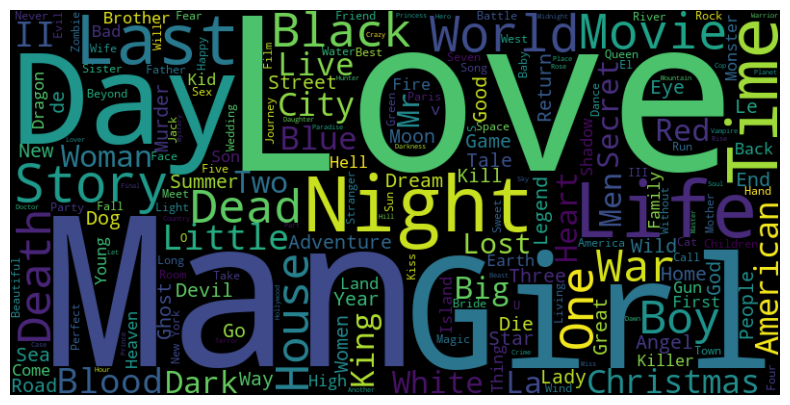

In [52]:
#Nube de palabras
texto = ' '.join(df_movies['title'])
wordcloud = WordCloud(width=800, height=400)
wordcloud.generate_from_text(texto)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

VII. ALGUNAS PREGUNTAS

1.- ¿Cuál es la película con mayor popularidad registrada?

In [53]:
morepopular_movie = df_fun1[df_fun1['popularity']==df_fun1['popularity'].max()]
morepopular_movie[['title', 'popularity']]

,title,popularity
30747,Minions,547.49


Rpta: Minions con una popularidad de 547. 49

2.- ¿Cuántas producciones tuvo la película con mayor popularidad?

In [54]:
df_fun1[df_fun1['title']== 'Minions']

,title,release_date,release_year,popularity,vote_average,vote_count
30747,Minions,2015-06-17,2015,547.49,6.4,4729.0


Rpta: Vemos que solo tuvo una producción

3.- ¿Cuál es el actor con mayor cantidad de participaciones en películas?

In [55]:
#Definimos una función que nos permita calular la cantidad de repeticiones de actores por nombres
def count_actor_occurrences(df, column_name):
    cast_column = df[column_name].str.split(',')  # Dividir los nombres de actores en cada fila
    actor_counts = cast_column.explode().str.strip().value_counts()  # Contar las repeticiones de cada nombre de actor
    return actor_counts

In [56]:
#Calculamos la cantidad de repeticiones utilizando nuestra función
actor_counts = count_actor_occurrences(df_fun2, 'cast')
actor_counts

cast
Jr.                   304
Bess Flowers          241
Christopher Lee       148
John Wayne            125
Samuel L. Jackson     123
                     ... 
Allessandra Zoppi       1
Raffaela Davi           1
Jacques Peyrac          1
Francesca Balletta      1
Aleksandr Chabrov       1
Name: count, Length: 202661, dtype: int64

Rpta: Debido a que no sabemos el nombre completo del actor Jr. tomaremos como el actor con más participaciones en películas a Bess Flowers

4.- ¿Cuáles son las películas que mayor retorno, presupuesto y ganancia tuvieron?

In [57]:
#Eliminamos la columna director de nuestro df_fun3, ya que no es necesario y creamos un nuevo dataframe
df_titulos = df_fun3.drop('director', axis=1)

In [58]:
#Visualizamos
df_titulos

,title,release_date,budget,revenue,return
0,Toy Story,1995-10-30,30000000,373554033.0,12.45
1,Jumanji,1995-12-15,65000000,262797249.0,4.04
2,Grumpier Old Men,1995-12-22,0,0.0,0.00
3,Waiting to Exhale,1995-12-22,16000000,81452156.0,5.09
4,Father of the Bride Part II,1995-02-10,0,76578911.0,0.00
...,...,...,...,...,...
45446,Robin Hood,1991-05-13,0,0.0,0.00
45447,Century of Birthing,2011-11-17,0,0.0,0.00
45448,Betrayal,2003-08-01,0,0.0,0.00
45449,Satan Triumphant,1917-10-21,0,0.0,0.00


In [60]:
#Realizamos nuestra consulta
mayor_retorno = df_titulos[df_titulos['return']==df_titulos['return'].max()]
mayor_retorno[['title', 'return']]


,title,return
4007,Less Than Zero,12396383.0


In [61]:
#Realizamos nuestra consulta
mayor_ganancia = df_titulos[df_titulos['revenue']==df_titulos['revenue'].max()]
mayor_ganancia[['title', 'revenue']]

,title,revenue
14611,Avatar,2.787965e+09


In [62]:
#Realizamos nuestra consulta
mayor_presupuesto = df_titulos[df_titulos['budget']==df_titulos['budget'].max()]
mayor_presupuesto[['title', 'budget']]

,title,budget
17184,Pirates of the Caribbean: On Stranger Tides,380000000


RPTA: 
Vemos que:
- La película con mayor presupuesto fue Pirates of the Caribbean: On Stranger Tides.
- La película con mayor ganancia fue Avatar.
- La película con mayor retorno fue Less Than Zero.

5.- ¿Cuál fue el director que más producciones realizó?

In [63]:
#Calculamos la cantidad de repeticiones utilizando nuestra función, en este caso utilizando la columna director
actor_counts = count_actor_occurrences(df_fun3, 'director')
actor_counts

director
John Ford                    68
Michael Curtiz               65
Werner Herzog                55
Alfred Hitchcock             53
Georges Méliès               51
                             ..
Lawrie Brewster               1
Connie Stevens                1
Patrick Hasson                1
Juan Carlos Saizarbitoria     1
Daisy Asquith                 1
Name: count, Length: 19709, dtype: int64

RPTA: Vemos que el director con más producciones es  John Ford.

CONCLUSIONES

1.- En el gráfico de dispersión de promedio de votos por ganancia vemos que hay una relacion en forma de una curva similar a la de una campana de Gauss sugiere una distribución normal de los datos y una posible relación entre el promedio de votos y la ganancia lo cual indica que el promedio de votos y la ganancia, y esta relación puede ser aproximadamente simétrica.Esto significa que a medida que el promedio de votos aumenta o disminuye desde el valor central, la ganancia también puede seguir un patrón similar.

2.- La mayor concentración de datos alrededor del valor central sugiere que, en general, hay una relación más fuerte entre el promedio de votos y el presupuesto. Esta mayor pronunciación en la curva de campana de Gauss indica que el presupuesto tiene un impacto más significativo en el promedio de votos de las películas. Por lo tanto, la relación entre estas variables es más sólida y predecible.

3.- En el gráfico de dispersión de ingresos por año de lanzamiento la curva ascendente indica que, en general, a medida que los años de lanzamiento de las películas son más recientes, se observan mayores ingresos. Esto puede indicar un aumento en la popularidad de las películas más recientes, un mayor alcance de distribución y cambios en las preferencias del público; esta tendencia ascendente en la curva sugiere que el año de lanzamiento puede ser un factor importante para predecir los ingresos de una película.

4.- De la matriz de correlacion vemos una alta relacion entre las ganancias vs el presupuesto, popularidad vs presupuesto, ganancia vs popularidad que podriamos tomar en cuenta para realizar un analisis mas exhaustivo segun los primeros vistazos que pudimos observar en estos graficos.